In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/Users/**********/Downloads/Mall_Customers.csv")

In [211]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [212]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# univariate analysis

In [213]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [215]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


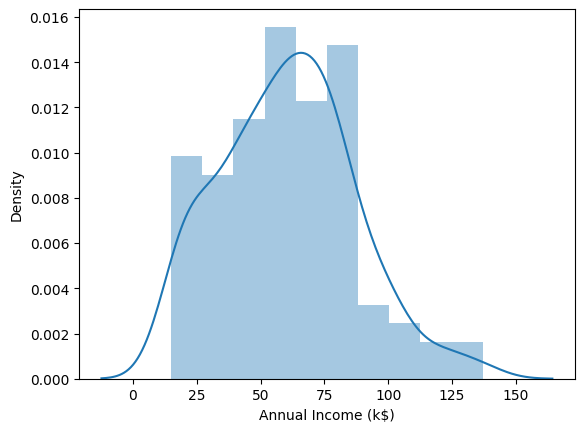

In [216]:
sns.distplot(df['Annual Income (k$)']);

In [217]:
df['Annual Income (k$)'].skew()

np.float64(0.3218425498619055)

In [218]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

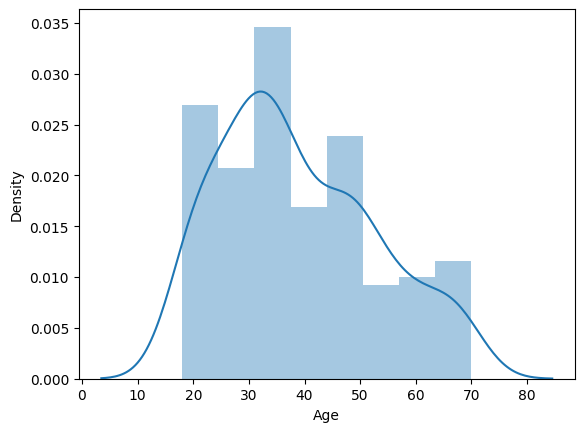

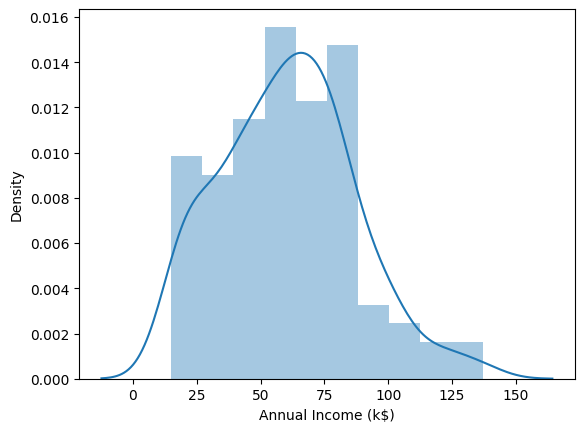

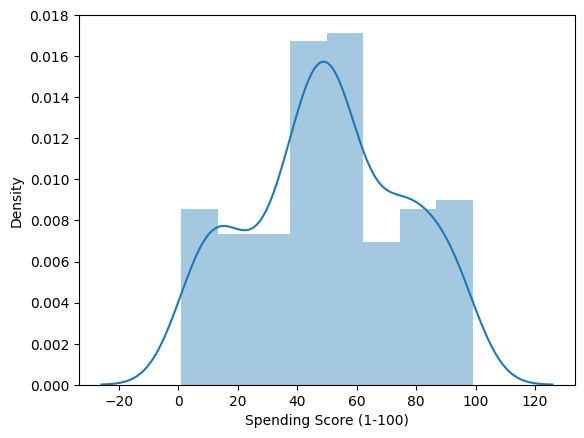

In [219]:
column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.distplot(df[i]);

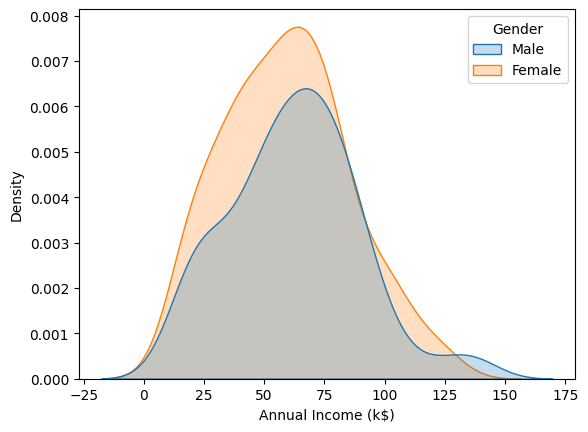

In [220]:
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", shade = True);

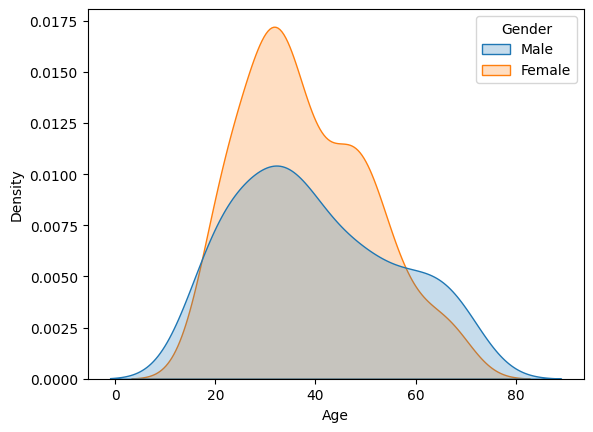

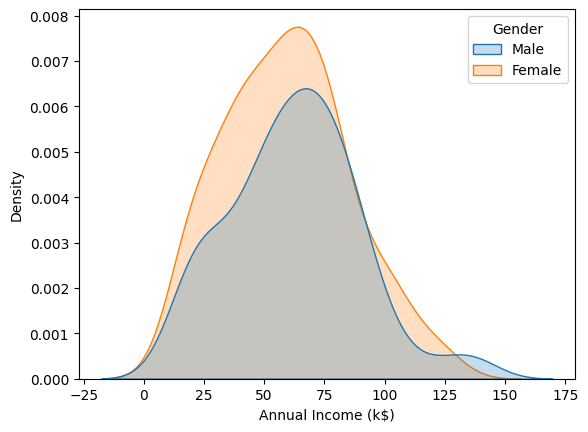

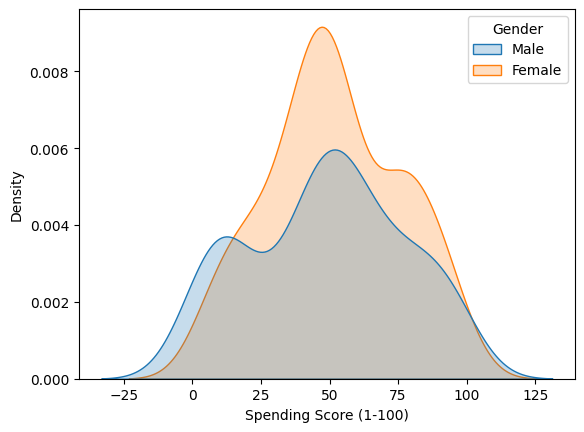

In [221]:
column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue="Gender", shade = True);

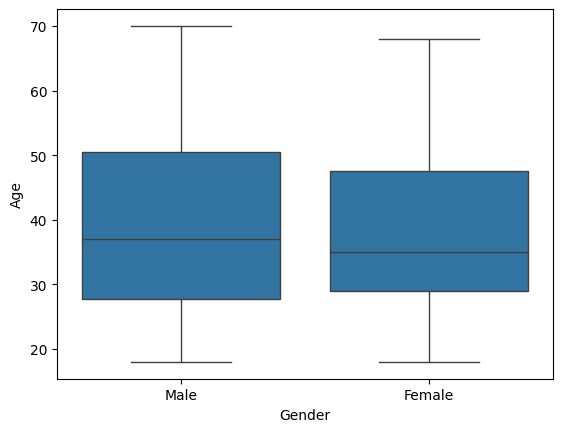

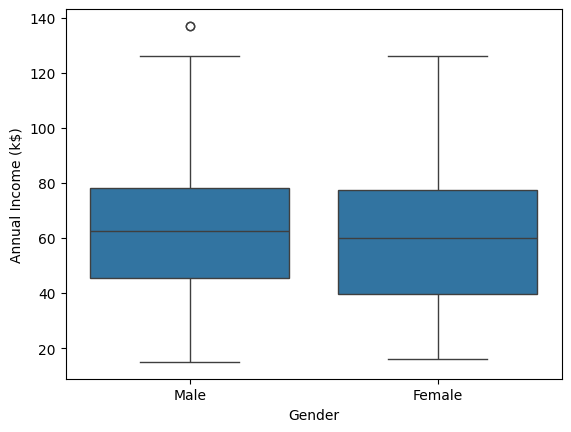

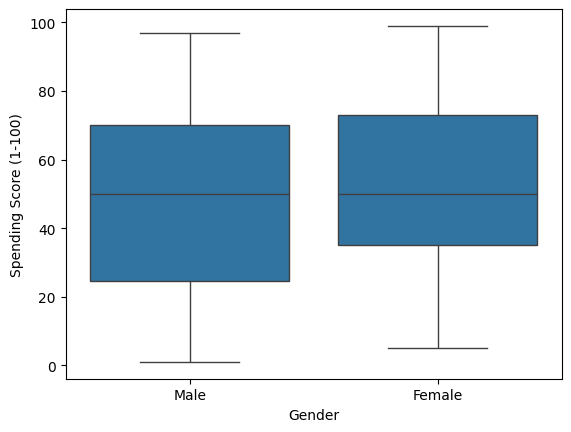

In [222]:
column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sns.boxplot(data = df, x = "Gender", y = i);

In [223]:
df['Gender'].value_counts(normalize='all')

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# bivariate analysis

In [224]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

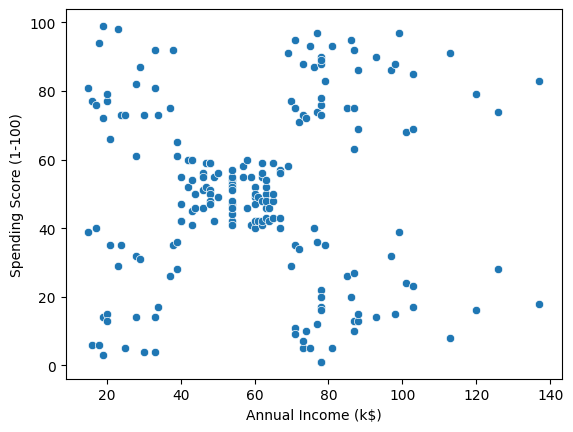

In [225]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)");

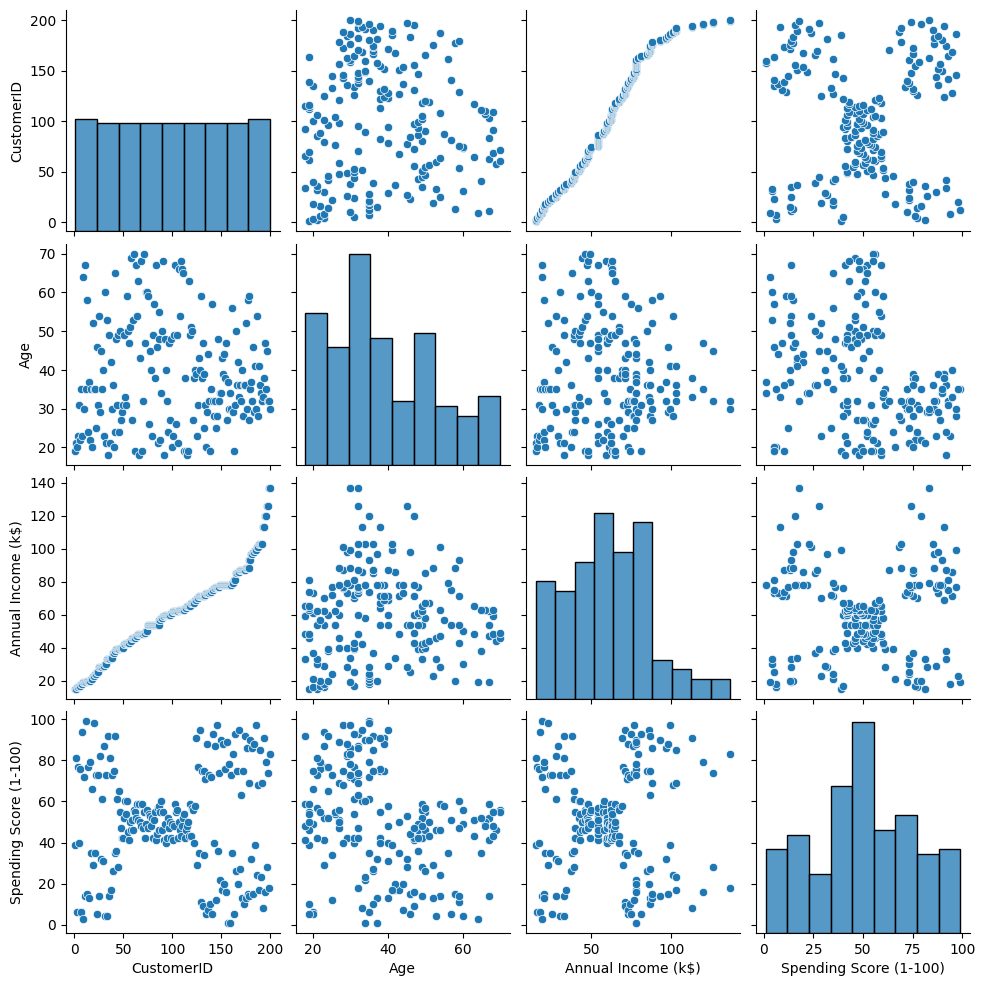

In [226]:
sns.pairplot(data = df);

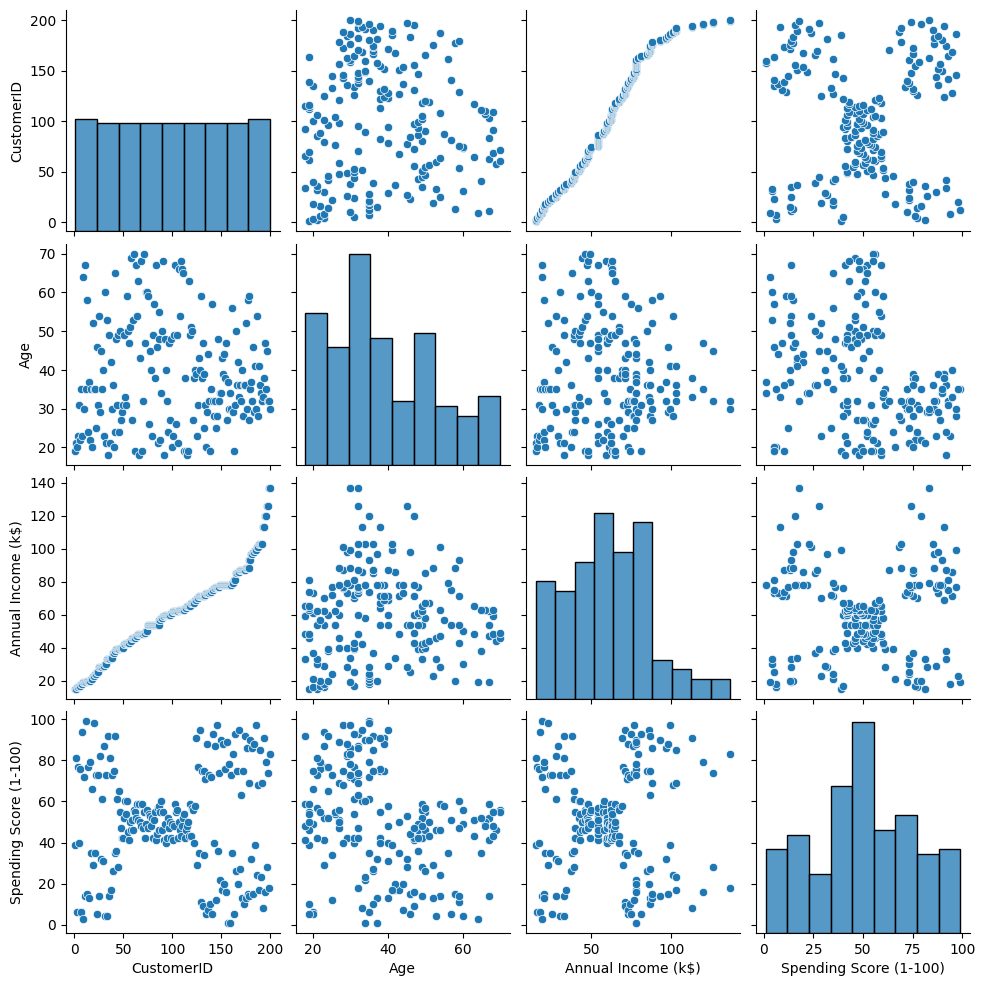

In [227]:
#df = df.drop(['CustomerID'], axis = 1)
sns.pairplot(data = df);

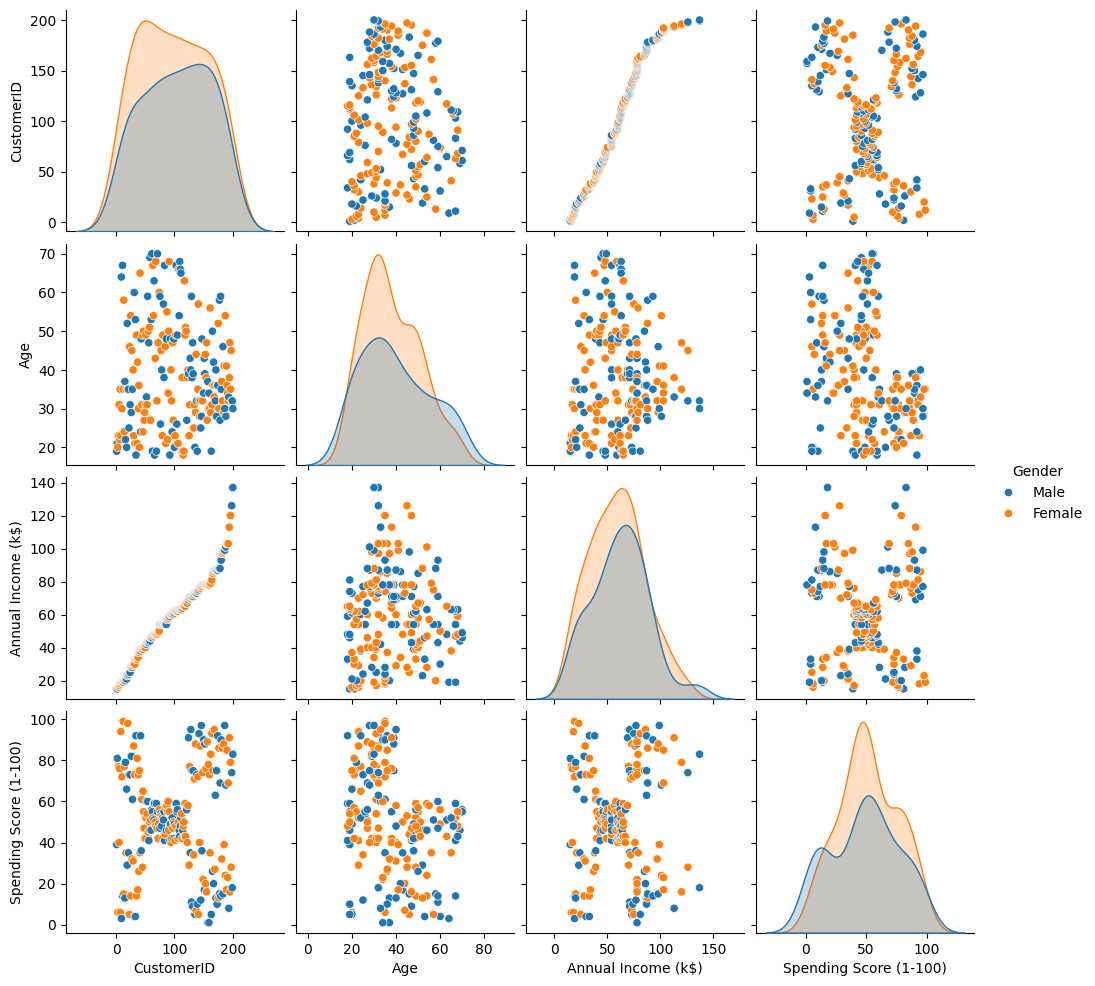

In [228]:
#df = df.drop(['CustomerID'], axis = 1)
sns.pairplot(data = df, hue="Gender");

In [229]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [230]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


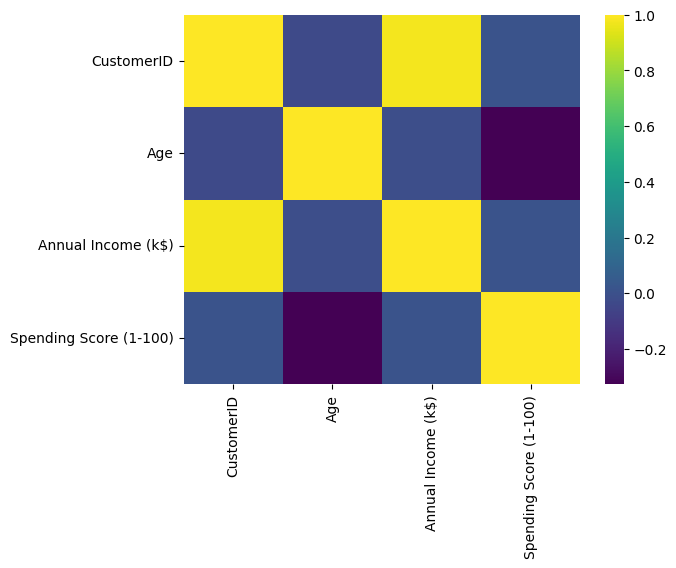

In [231]:
sns.heatmap(df.corr(numeric_only=True),cmap="viridis");

# clustering - multivariate, univariate and bivariate

In [232]:
clustering1 = KMeans(n_clusters=3)


In [233]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [234]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [235]:
df['income_clusters'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [236]:
df['income_clusters'].value_counts()

income_clusters
2    86
0    58
1    56
Name: count, dtype: int64

In [237]:
clustering1.inertia_

25640.457784396836

In [238]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [239]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 25640.457784396836,
 14631.886877828052,
 8667.679614837509,
 5050.9047619047615,
 4055.31512605042,
 3464.9646456484697,
 2706.7884207295974,
 1954.1794871794873]

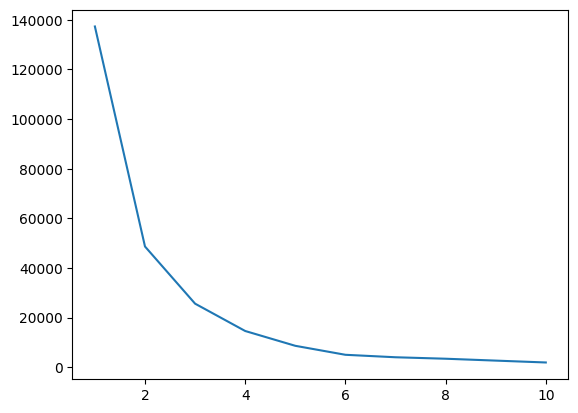

In [240]:
plt.plot(range(1,11),intertia_scores);

In [241]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'income_clusters'],
      dtype='object')

In [242]:
df.groupby('income_clusters')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_clusters,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


# bivariate clustering

In [243]:
clustering2 = KMeans(n_clusters=6)

In [244]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=6)

In [245]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [246]:
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income_clusters,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


In [247]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
0    80
1    36
2    29
4    23
3    22
5    10
Name: count, dtype: int64

In [248]:
clustering2.inertia_

37239.83554245604

In [249]:
intertia_scores2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans.inertia_)

In [250]:
intertia_scores2

[269981.28,
 186687.0431253171,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 37455.984555160285,
 30566.45113025186,
 25315.54182271217,
 23198.520034157864,
 21348.40333977333]

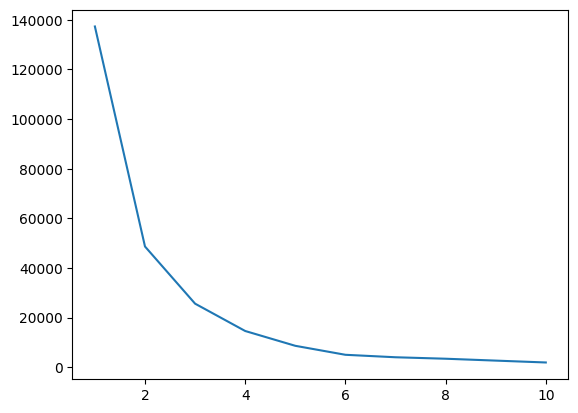

In [251]:
plt.plot(range(1,11),intertia_scores);

In [252]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'income_clusters',
       'Spending and Income Cluster'],
      dtype='object')

In [254]:
clustering1.cluster_centers_

array([[29.55172414],
       [92.14285714],
       [60.90697674]])

In [255]:
clustering2.cluster_centers_
cluster2centers = pd.DataFrame(clustering2.cluster_centers_)

array([[ 55.0875    ,  49.7125    ],
       [ 87.75      ,  17.58333333],
       [ 78.55172414,  82.17241379],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [109.7       ,  82.        ]])

In [256]:
cluster2centers = pd.DataFrame(clustering2.cluster_centers_)

In [258]:
cluster2centers.columns = ['x', 'y']

In [259]:
cluster2centers

,x,y
0,55.087500,49.712500
1,87.750000,17.583333
2,78.551724,82.172414
3,25.727273,79.363636
4,26.304348,20.913043
5,109.700000,82.000000


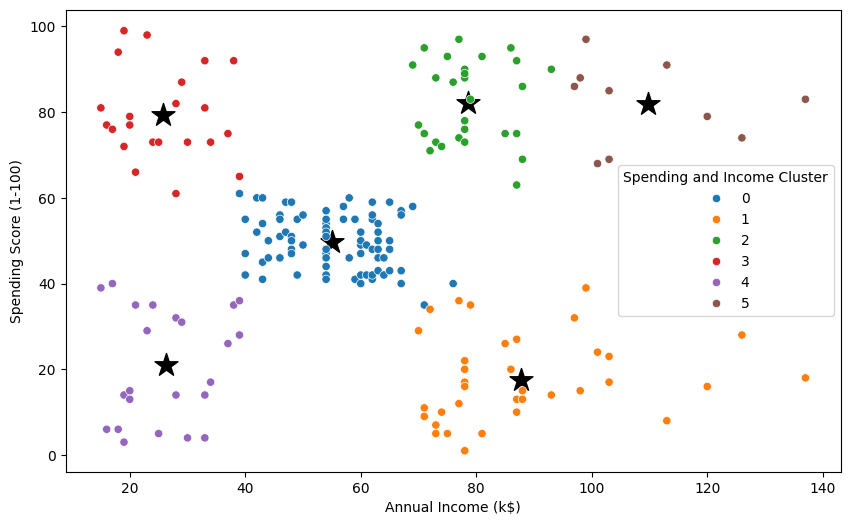

In [264]:
plt.figure(figsize=(10,6))
plt.scatter(x = cluster2centers['x'], y = cluster2centers['y'], s = 300, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10');

In [265]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.517241,0.482759
3,0.590909,0.409091
4,0.608696,0.391304
5,0.600000,0.400000


In [267]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.862069,78.551724,82.172414
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043
5,32.200000,109.700000,82.000000


# multivariat clustering

In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
scale = StandardScaler()

In [271]:
dff = pd.get_dummies(df,drop_first=1)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income_clusters,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,4,True
1,2,21,15,81,0,3,True
2,3,20,16,6,0,4,False
3,4,23,16,77,0,3,False
4,5,31,17,40,0,4,False


In [276]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [277]:
dff = scale.fit_transform(dff)

In [278]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


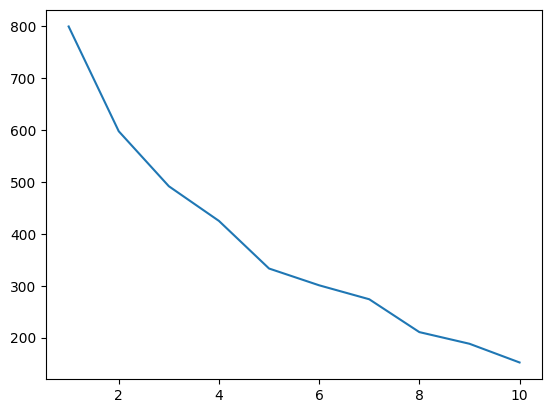

In [279]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [280]:
df.to_csv('Clustering.csv')